Aplicación de PCA en clasificación --- 7:17 min
===

* 7:17 min | Última modificación: Septiembre 24, 2021 | [YouTube](https://youtu.be/GrCSscrpAAI)

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    shuffle=False,
)

![digits.png](assets/digits.png)

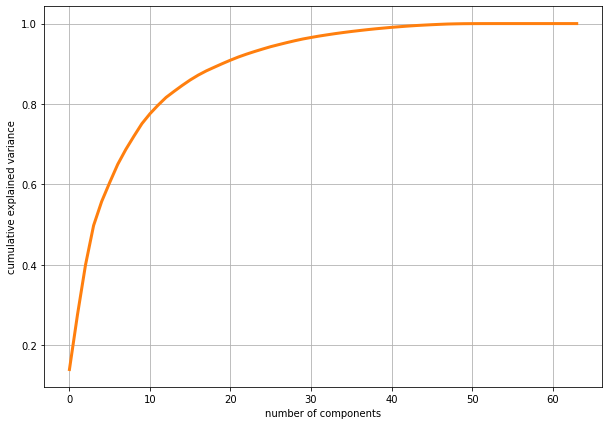

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)

plt.figure(figsize=(10, 7))
# plt.style.use("dark_background")
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=3)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

n_components = np.arange(1, 40)

scores_train = []
scores_test = []

for n_component in n_components:

    X_proj_train = pca.transform(X_train)[:, 0:n_component]
    X_proj_test = pca.transform(X_test)[:, 0:n_component]

    clf = SVC(gamma=0.001)

    clf.fit(X_proj_train, y_train)

    y_predicted_train = clf.predict(X_proj_train)
    y_predicted_test = clf.predict(X_proj_test)

    scores_train.append(accuracy_score(y_true=y_train, y_pred=y_predicted_train))
    scores_test.append(accuracy_score(y_true=y_test, y_pred=y_predicted_test))

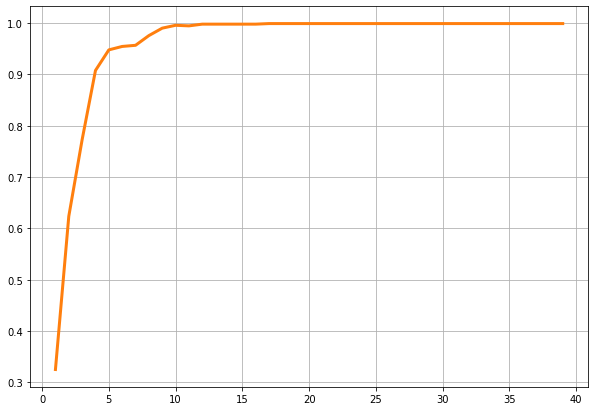

In [4]:
plt.figure(figsize=(10, 7))
plt.plot(n_components, scores_train, color="tab:orange", linewidth=3)
plt.grid()
plt.show()

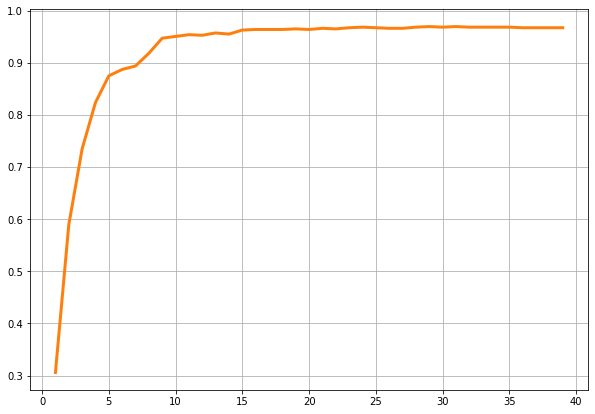

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(n_components, scores_test, color="tab:orange", linewidth=3)
plt.grid()
plt.show()

In [6]:
X_proj_train = pca.transform(X_train)[:, 0:10]
X_proj_test = pca.transform(X_test)[:, 0:10]

clf = SVC(gamma=0.001)
clf.fit(X_proj_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

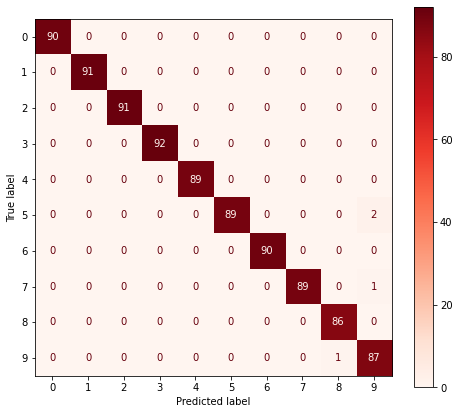

In [7]:
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(8, 7))
plot_confusion_matrix(
    clf,
    X_proj_train,
    y_train,
    cmap="Reds",
    ax=plt.gca(),
)
plt.show()

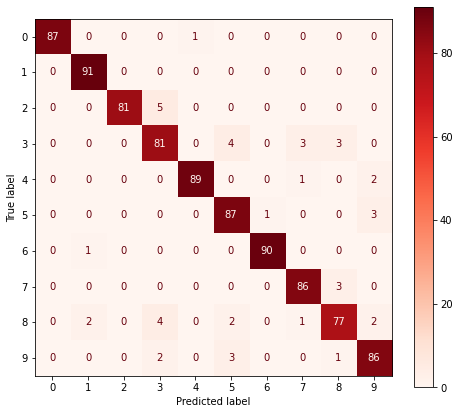

In [8]:
plt.figure(figsize=(8, 7))
plot_confusion_matrix(
    clf,
    X_proj_test,
    y_test,
    cmap="Reds",
    ax=plt.gca(),
)
plt.show()